In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import yaml
import zipfile

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rcParams

from chspy import CubicHermiteSpline

# os.chdir(Path(os.getcwd()).parent)
import sys
from pathlib import Path
current_dir = Path().resolve()
sys.path.append(str(current_dir.parent))

from assistive_arm.utils.data_preprocessing import prepare_opencap_markers, smooth_dataframe

## Settings

In [9]:
# Plot settings
plt.style.use('fivethirtyeight')

rcParams['font.size'] = 12

rcParams['figure.titlesize'] = 16
rcParams['figure.titleweight'] = 'normal'

rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 16
rcParams['axes.titleweight'] = 'normal'

rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

rcParams['axes.grid'] = False
rcParams['grid.linewidth'] = 0.5

# make background white
rcParams['figure.facecolor'] = 'white'
rcParams['axes.facecolor'] = 'white'
rcParams['savefig.facecolor'] = 'white'

rcParams['lines.linewidth'] = 1.5
rcParams['lines.markersize'] = 10

# Box around plot
rcParams['axes.linewidth'] = 0.4
rcParams['axes.edgecolor'] = 'black'

# Add ticks
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 5

rcParams['legend.fontsize'] = 12
rcParams['legend.edgecolor'] = 'black'

# Output rcParams as a custom style file

# Load rcParams from a custom style file
# plt.style.use('../paper.mplstyle')

## Read data

### Marker data

In [10]:
# Session paramaters
subject = "CG" # CG / ZK
task = "stairs" # sts / reaching / stairs
date = "20240514"
assistance = "no_arm" # no_arm / assistive_arm_off / assistive_arm_on
trial_ID = "LRLR2"
assistive_force = None  # 700N or None ?? or 100N??
model_type = "simple" # simple / full

# Session datas
session = Path(f"/Users/camilleguillaume/Documents/MasterThesis/Opencap_data/{date}_opencap_{task}_{subject}")
trial_name = f"{task}_{assistance}_{trial_ID}"

# Set directories
opencap_markers = pd.read_csv(session / "MarkerData" / f"{trial_name}.trc", delimiter="\t", skiprows=3).tail(-1)
filtered_markers = prepare_opencap_markers(opencap_markers)

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
filtered_markers

Time     Neck                    RShoulder                      RElbow                      RWrist                    LShoulder                      LElbow                      LWrist                      midHip                        RHip                       RKnee                      RAnkle                        LHip                       LKnee                      LAnkle                     LBigToe                    LSmallToe                       LHeel                     RBigToe                    RSmallToe                       RHeel                    r.ASIS_study                     L.ASIS_study                     r.PSIS_study                     L.PSIS_study                     r_knee_study                     r_mknee_study                     r_ankle_study                     r_mankle_study                     r_toe_study                     r_5meta_study                     r_calc_study                     L_knee_study                     L_mknee_study                     L_ankle_study                     L_mankle_study                     L_toe_study                     L_calc_study                     L_5meta_study                     r_shoulder_study                     L_shoulder_study                      C7_study                     r_thigh1_study                     r_thigh2_study                     r_thigh3_study                     L_thigh1_study                     L_thigh2_study                     L_thigh3_study                     r_sh1_study                     r_sh2_study                     r_sh3_study                     L_sh1_study                     L_sh2_study                     L_sh3_study                     RHJC_study                     LHJC_study                     r_lelbow_study                     r_melbow_study                     r_lwrist_study                     r_mwrist_study                     L_lelbow_study                     L_melbow_study                     L_lwrist_study                     L_mwrist_study                    
            t        X         Y        Z         X         Y        Z        X         Y        Z        X         Y        Z         X         Y        Z        X         Y        Z        X         Y        Z        X         Y        Z        X         Y        Z        X         Y        Z        X         Y        Z        X         Y        Z        X         Y        Z        X         Y        Z        X         Y        Z         X         Y        Z        X         Y        Z        X         Y        Z         X         Y        Z        X         Y        Z            X         Y         Z            X         Y         Z            X         Y         Z            X         Y         Z            X         Y         Z             X         Y         Z             X         Y         Z              X         Y         Z           X         Y         Z             X         Y         Z            X         Y         Z            X         Y         Z             X         Y         Z             X         Y         Z              X         Y         Z           X         Y         Z            X         Y         Z             X         Y         Z                X         Y         Z                X         Y         Z         X         Y         Z              X         Y         Z              X         Y         Z              X         Y         Z              X         Y         Z              X         Y         Z              X         Y         Z           X         Y         Z           X         Y         Z           X         Y         Z           X         Y         Z           X         Y         Z           X         Y         Z          X         Y         Z          X         Y         Z              X         Y         Z              X         Y         Z              X         Y         Z              X         Y         Z              X         Y         Z              X         Y         Z              X         

#### Feet markers

In [12]:
#feet_markers=filtered_markers[["r_ankle_study","r_calc_study","r_5meta_study","r_toe_study","L_ankle_study","L_calc_study","L_5meta_study","L_toe_study"]].copy()
feet_markers_right=filtered_markers[["Time","r_ankle_study","r_calc_study","r_5meta_study","r_toe_study"]].copy()
feet_markers_left=filtered_markers[["Time","L_ankle_study","L_calc_study","L_5meta_study","L_toe_study"]].copy()
feet_markers=pd.concat([feet_markers_right,feet_markers_left], axis=1).round(3)
feet_markers = feet_markers.loc[:, ~feet_markers.columns.duplicated()]
feet_markers

Time r_ankle_study               r_calc_study               r_5meta_study               r_toe_study               L_ankle_study               L_calc_study               L_5meta_study               L_toe_study              
         t             X      Y      Z            X      Y      Z             X      Y      Z           X      Y      Z             X      Y      Z            X      Y      Z             X      Y      Z           X      Y      Z
1    0.000        -0.242  0.328  0.067       -0.297  0.297  0.009        -0.156  0.289  0.097      -0.111  0.291  0.048        -0.242  0.323 -0.226       -0.306  0.287 -0.173        -0.141  0.291 -0.248      -0.094  0.300 -0.191
2    0.017        -0.242  0.323  0.061       -0.299  0.290  0.005        -0.156  0.288  0.088      -0.110  0.292  0.041        -0.240  0.319 -0.221       -0.309  0.282 -0.171        -0.136  0.286 -0.242      -0.091  0.298 -0.187
3    0.033        -0.242  0.320  0.060       -0.297  0.285  0.003        -0.157  0.287  0.089      -0.109  0.292  0.043        -0.241  0.317 -0.218       -0.312  0.279 -0.169        -0.135  0.286 -0.239      -0.090  0.298 -0.184
4    0.050        -0.241  0.319  0.061       -0.295  0.284  0.003        -0.155  0.287  0.089      -0.108  0.293  0.043        -0.241  0.317 -0.217       -0.312  0.278 -0.167        -0.135  0.285 -0.237      -0.091  0.299 -0.183
5    0.067        -0.241  0.319  0.060       -0.295  0.283  0.002        -0.155  0.287  0.089      -0.108  0.293  0.044        -0.241  0.315 -0.217       -0.312  0.276 -0.167        -0.135  0.284 -0.236      -0.091  0.299 -0.182
..     ...           ...    ...    ...          ...    ...    ...           ...    ...    ...         ...    ...    ...           ...    ...    ...          ...    ...    ...           ...    ...    ...         ...    ...    ...
534  8.883         1.066  1.005  0.075        1.016  0.967  0.018         1.139  0.980  0.101       1.177  0.990  0.061         1.080  1.012 -0.192        1.025  0.976 -0.147         1.155  0.979 -0.201       1.189  0.991 -0.154
535  8.900         1.065  1.003  0.075        1.015  0.965  0.018         1.138  0.979  0.101       1.176  0.988  0.061         1.080  1.010 -0.192        1.025  0.973 -0.147         1.155  0.978 -0.201       1.189  0.990 -0.154
536  8.917         1.064  1.002  0.075        1.014  0.963  0.018         1.137  0.977  0.101       1.176  0.987  0.062         1.080  1.008 -0.191        1.024  0.971 -0.147         1.155  0.976 -0.201       1.189  0.989 -0.154
537  8.933         1.064  1.001  0.075        1.013  0.962  0.018         1.137  0.977  0.102       1.175  0.986  0.062         1.079  1.007 -0.191        1.024  0.969 -0.147         1.155  0.976 -0.201       1.189  0.989 -0.154
538  8.950         1.064  1.001  0.075        1.013  0.962  0.018         1.137  0.978  0.102       1.176  0.987  0.061         1.080  1.008 -0.191        1.025  0.970 -0.147         1.156  0.977 -0.201       1.190  0.990 -0.154

[538 rows x 25 columns]

In [13]:
reference_feet_markers=feet_markers.loc[[1,feet_markers.shape[0]],:]
reference_feet_markers.index = ["t0", "tf"]
reference_feet_markers

Time r_ankle_study               r_calc_study               r_5meta_study               r_toe_study               L_ankle_study               L_calc_study               L_5meta_study               L_toe_study             
       t             X      Y      Z            X      Y      Z             X      Y      Z           X      Y      Z             X      Y      Z            X      Y      Z             X      Y      Z           X     Y      Z
t0  0.00        -0.242  0.328  0.067       -0.297  0.297  0.009        -0.156  0.289  0.097      -0.111  0.291  0.048        -0.242  0.323 -0.226       -0.306  0.287 -0.173        -0.141  0.291 -0.248      -0.094  0.30 -0.191
tf  8.95         1.064  1.001  0.075        1.013  0.962  0.018         1.137  0.978  0.102       1.176  0.987  0.061         1.080  1.008 -0.191        1.025  0.970 -0.147         1.156  0.977 -0.201       1.190  0.99 -0.154

In [14]:
mean_ankle_Y = np.mean([reference_feet_markers.r_ankle_study.Y.t0, reference_feet_markers.L_ankle_study.Y.t0]).round(3)
mean_calc_Y = np.mean([reference_feet_markers.r_calc_study.Y.t0, reference_feet_markers.L_calc_study.Y.t0]).round(3)
mean_5meta_Y = np.mean([reference_feet_markers.r_5meta_study.Y.t0, reference_feet_markers.L_5meta_study.Y.t0]).round(3)
mean_toe_Y = np.mean([reference_feet_markers.r_toe_study.Y.t0, reference_feet_markers.L_toe_study.Y.t0]).round(3)
print("initial markers: ", mean_ankle_Y,mean_calc_Y,mean_5meta_Y,mean_toe_Y)

initial_markers = {
    "mean_ankle_Y": mean_ankle_Y,
    "mean_calc_Y": mean_calc_Y,
    "mean_5meta_Y": mean_5meta_Y,
    "mean_toe_Y": mean_toe_Y
}
print(initial_markers)

initial markers:  0.326 0.292 0.29 0.296
{'mean_ankle_Y': 0.326, 'mean_calc_Y': 0.292, 'mean_5meta_Y': 0.29, 'mean_toe_Y': 0.296}


In [15]:
mean_ankle_Y = np.mean([reference_feet_markers.r_ankle_study.Y.tf, reference_feet_markers.L_ankle_study.Y.tf]).round(3)
mean_calc_Y = np.mean([reference_feet_markers.r_calc_study.Y.tf, reference_feet_markers.L_calc_study.Y.tf]).round(3)
mean_5meta_Y = np.mean([reference_feet_markers.r_5meta_study.Y.tf, reference_feet_markers.L_5meta_study.Y.tf]).round(3)
mean_toe_Y = np.mean([reference_feet_markers.r_toe_study.Y.tf, reference_feet_markers.L_toe_study.Y.tf]).round(3)
print("final markers: ", mean_ankle_Y,mean_calc_Y,mean_5meta_Y,mean_toe_Y)

final_markers = {
    "mean_ankle_Y": mean_ankle_Y,
    "mean_calc_Y": mean_calc_Y,
    "mean_5meta_Y": mean_5meta_Y,
    "mean_toe_Y": mean_toe_Y,
}
print(final_markers)

final markers:  1.004 0.966 0.978 0.988
{'mean_ankle_Y': 1.004, 'mean_calc_Y': 0.966, 'mean_5meta_Y': 0.978, 'mean_toe_Y': 0.988}


In [16]:
feet_markers_Y = pd.concat([feet_markers.loc[:, pd.IndexSlice['Time', :]], feet_markers.loc[:, pd.IndexSlice[:, 'Y']]], axis=1)
feet_markers_Y.columns = feet_markers_Y.columns.droplevel(1)
feet_markers_Y['mean_ankle']=feet_markers_Y[['r_ankle_study','L_ankle_study']].mean(axis=1)
feet_markers_Y['mean_calc']=feet_markers_Y[['r_ankle_study','L_ankle_study']].mean(axis=1)
feet_markers_Y['mean_5meta']=feet_markers_Y[['r_ankle_study','L_ankle_study']].mean(axis=1)
feet_markers_Y

,Time,r_ankle_study,r_calc_study,r_5meta_study,r_toe_study,L_ankle_study,L_calc_study,L_5meta_study,L_toe_study,mean_ankle,mean_calc,mean_5meta
1,0.000,0.328,0.297,0.289,0.291,0.323,0.287,0.291,0.300,0.3255,0.3255,0.3255
2,0.017,0.323,0.290,0.288,0.292,0.319,0.282,0.286,0.298,0.3210,0.3210,0.3210
3,0.033,0.320,0.285,0.287,0.292,0.317,0.279,0.286,0.298,0.3185,0.3185,0.3185
4,0.050,0.319,0.284,0.287,0.293,0.317,0.278,0.285,0.299,0.3180,0.3180,0.3180
5,0.067,0.319,0.283,0.287,0.293,0.315,0.276,0.284,0.299,0.3170,0.3170,0.3170
...,...,...,...,...,...,...,...,...,...,...,...,...
534,8.883,1.005,0.967,0.980,0.990,1.012,0.976,0.979,0.991,1.0085,1.0085,1.0085
535,8.900,1.003,0.965,0.979,0.988,1.010,0.973,0.978,0.990,1.0065,1.0065,1.0065
536,8.917,1.002,0.963,0.977,0.987,1.008,0.971,0.976,0.989,1.0050,1.0050,1.0050
537,8.933,1.001,0.962,0.977,0.986,1.007,0.969,0.976,0.989,1.0040,1.0040,1.0040


In [17]:
r_ankle_diff=feet_markers_right.r_ankle_study.Y.iloc[-1]-feet_markers_right.r_ankle_study.Y.iloc[0]
r_calc_diff=feet_markers_right.r_calc_study.Y.iloc[-1]-feet_markers_right.r_calc_study.Y.iloc[0]
r_5meta_diff=feet_markers_right.r_5meta_study.Y.iloc[-1]-feet_markers_right.r_5meta_study.Y.iloc[0]
r_toe_diff=feet_markers_right.r_toe_study.Y.iloc[-1]-feet_markers_right.r_toe_study.Y.iloc[0]
print("right: ",r_ankle_diff, r_calc_diff, r_5meta_diff, r_toe_diff)
height_diff=np.mean([r_ankle_diff,r_calc_diff,r_5meta_diff,r_toe_diff])
step_height=height_diff/4
print("right step_height: ",step_height)
print("right height diff: ", height_diff)

L_ankle_diff=feet_markers_left.L_ankle_study.Y.iloc[-1]-feet_markers_left.L_ankle_study.Y.iloc[0]
L_calc_diff=feet_markers_left.L_calc_study.Y.iloc[-1]-feet_markers_left.L_calc_study.Y.iloc[0]
L_5meta_diff=feet_markers_left.L_5meta_study.Y.iloc[-1]-feet_markers_left.L_5meta_study.Y.iloc[0]
L_toe_diff=feet_markers_left.L_toe_study.Y.iloc[-1]-feet_markers_left.L_toe_study.Y.iloc[0]
print("left: ",L_ankle_diff, L_calc_diff, L_5meta_diff, L_toe_diff)
height_diff=np.mean([L_ankle_diff,L_calc_diff,L_5meta_diff,L_toe_diff])
step_height=height_diff/4
print("left step_height: ",step_height)
print("left height diff: ", height_diff)

right:  0.6734646000000001 0.6653290000000001 0.6890021 0.6964702
right step_height:  0.17026661875000004
right height diff:  0.6810664750000002
left:  0.6849706999999998 0.6832343 0.6864794999999999 0.6893827
left step_height:  0.17150419999999997
left height diff:  0.6860167999999999


In [18]:
r_ankle_diff=feet_markers_right.r_ankle_study.X.iloc[-1]-feet_markers_right.r_ankle_study.X.iloc[0]
r_calc_diff=feet_markers_right.r_calc_study.X.iloc[-1]-feet_markers_right.r_calc_study.X.iloc[0]
r_5meta_diff=feet_markers_right.r_5meta_study.X.iloc[-1]-feet_markers_right.r_5meta_study.X.iloc[0]
r_toe_diff=feet_markers_right.r_toe_study.X.iloc[-1]-feet_markers_right.r_toe_study.X.iloc[0]
print("right: ",r_ankle_diff, r_calc_diff, r_5meta_diff, r_toe_diff)
height_diff=np.mean([r_ankle_diff,r_calc_diff,r_5meta_diff,r_toe_diff])
step_height=height_diff/4
print("right step_height: ",step_height)
print("right height diff: ", height_diff)

L_ankle_diff=feet_markers_left.L_ankle_study.X.iloc[-1]-feet_markers_left.L_ankle_study.X.iloc[0]
L_calc_diff=feet_markers_left.L_calc_study.X.iloc[-1]-feet_markers_left.L_calc_study.X.iloc[0]
L_5meta_diff=feet_markers_left.L_5meta_study.X.iloc[-1]-feet_markers_left.L_5meta_study.X.iloc[0]
L_toe_diff=feet_markers_left.L_toe_study.X.iloc[-1]-feet_markers_left.L_toe_study.X.iloc[0]
print("left: ",L_ankle_diff, L_calc_diff, L_5meta_diff, L_toe_diff)
height_diff=np.mean([L_ankle_diff,L_calc_diff,L_5meta_diff,L_toe_diff])
step_height=height_diff/4
print("left step_height: ",step_height)
print("left height diff: ", height_diff)

right:  1.3066164 1.3099774 1.2933716000000002 1.2870025999999999
right step_height:  0.3248105
right height diff:  1.299242
left:  1.3221971 1.3307707 1.297145 1.283499
left step_height:  0.3271007375
left height diff:  1.30840295


In [19]:
ankle_x = (filtered_markers["r_ankle_study"].X + filtered_markers["L_ankle_study"].X)/2 
ankle_y = (filtered_markers["r_ankle_study"].Y + filtered_markers["L_ankle_study"].Y)/2 
ankle_z = (filtered_markers["r_ankle_study"].Z + filtered_markers["L_ankle_study"].Z)/2 
ankle_marker = pd.DataFrame({"Time": filtered_markers.Time.t, "X": ankle_x, "Y": ankle_y, "Z": ankle_z})
ankle_marker

,Time,X,Y,Z
1,0.000000,-0.242271,0.325218,-0.079505
2,0.016667,-0.241223,0.321156,-0.079897
3,0.033333,-0.241769,0.318657,-0.079051
4,0.050000,-0.241160,0.318069,-0.078202
5,0.066667,-0.240924,0.317037,-0.078116
...,...,...,...,...
534,8.883333,1.072955,1.008657,-0.058714
535,8.900000,1.072565,1.006556,-0.058606
536,8.916667,1.072025,1.004640,-0.058248
537,8.933333,1.071555,1.003913,-0.058009


In [20]:
toe_x = (filtered_markers["r_toe_study"].X + filtered_markers["L_toe_study"].X)/2 
toe_y = (filtered_markers["r_toe_study"].Y + filtered_markers["L_toe_study"].Y)/2 
toe_z = (filtered_markers["r_toe_study"].Z + filtered_markers["L_toe_study"].Z)/2 
toe_marker = pd.DataFrame({"Time": filtered_markers.Time.t, "X": toe_x, "Y": toe_y, "Z": toe_z})
toe_marker

,Time,X,Y,Z
1,0.000000,-0.102198,0.295671,-0.071534
2,0.016667,-0.100076,0.295044,-0.072716
3,0.033333,-0.099454,0.295374,-0.070645
4,0.050000,-0.099372,0.296162,-0.069588
5,0.066667,-0.099758,0.296217,-0.069101
...,...,...,...,...
534,8.883333,1.182812,0.990280,-0.046560
535,8.900000,1.182728,0.988882,-0.046481
536,8.916667,1.182466,0.987735,-0.046168
537,8.933333,1.182252,0.987679,-0.045983


In [21]:
feet_markers.loc[np.abs(feet_markers["Time"].t-2.891)<0.01]

Time r_ankle_study               r_calc_study               r_5meta_study               r_toe_study             L_ankle_study               L_calc_study               L_5meta_study               L_toe_study              
         t             X      Y      Z            X      Y      Z             X      Y      Z           X    Y      Z             X      Y      Z            X      Y      Z             X      Y      Z           X      Y      Z
174  2.883        -0.237  0.322  0.059       -0.293  0.286  0.002        -0.151  0.292  0.086      -0.107  0.3  0.043        -0.234  0.322 -0.219       -0.304  0.285 -0.171        -0.132  0.290 -0.234       -0.09  0.303 -0.181
175  2.900        -0.237  0.321  0.060       -0.293  0.286  0.002        -0.151  0.292  0.086      -0.107  0.3  0.043        -0.234  0.322 -0.219       -0.305  0.284 -0.171        -0.132  0.289 -0.234       -0.09  0.303 -0.180

In [22]:
L_ankle_diff=feet_markers_left.L_ankle_study.X.iloc[175]-feet_markers_left.L_ankle_study.X.iloc[0]
L_calc_diff=feet_markers_left.L_calc_study.X.iloc[175]-feet_markers_left.L_calc_study.X.iloc[0]
L_5meta_diff=feet_markers_left.L_5meta_study.X.iloc[175]-feet_markers_left.L_5meta_study.X.iloc[0]
L_toe_diff=feet_markers_left.L_toe_study.X.iloc[175]-feet_markers_left.L_toe_study.X.iloc[0]
print("left: ",L_ankle_diff, L_calc_diff, L_5meta_diff, L_toe_diff)
height_diff=np.mean([L_ankle_diff,L_calc_diff,L_5meta_diff,L_toe_diff])
step_height=height_diff/4
print("left step_height: ",step_height)
print("left height diff: ", height_diff)

left:  0.007479300000000022 0.0005826999999999916 0.00822429999999999 0.002530699999999997
left step_height:  0.0011760625
left height diff:  0.00470425


In [23]:
r_ankle_diff=feet_markers_right.r_ankle_study.X.iloc[-1]-feet_markers_right.r_ankle_study.X.iloc[175]
r_calc_diff=feet_markers_right.r_calc_study.X.iloc[-1]-feet_markers_right.r_calc_study.X.iloc[175]
r_5meta_diff=feet_markers_right.r_5meta_study.X.iloc[-1]-feet_markers_right.r_5meta_study.X.iloc[175]
r_toe_diff=feet_markers_right.r_toe_study.X.iloc[-1]-feet_markers_right.r_toe_study.X.iloc[175]
print("right: ",r_ankle_diff, r_calc_diff, r_5meta_diff, r_toe_diff)
height_diff=np.mean([r_ankle_diff,r_calc_diff,r_5meta_diff,r_toe_diff])
step_height=height_diff/3
print("right step_height: ",step_height)
print("right height diff: ", height_diff)

L_ankle_diff=feet_markers_left.L_ankle_study.X.iloc[-1]-feet_markers_left.L_ankle_study.X.iloc[175]
L_calc_diff=feet_markers_left.L_calc_study.X.iloc[-1]-feet_markers_left.L_calc_study.X.iloc[175]
L_5meta_diff=feet_markers_left.L_5meta_study.X.iloc[-1]-feet_markers_left.L_5meta_study.X.iloc[175]
L_toe_diff=feet_markers_left.L_toe_study.X.iloc[-1]-feet_markers_left.L_toe_study.X.iloc[175]
print("left: ",L_ankle_diff, L_calc_diff, L_5meta_diff, L_toe_diff)
height_diff=np.mean([L_ankle_diff,L_calc_diff,L_5meta_diff,L_toe_diff])
step_height=height_diff/3
print("left step_height: ",step_height)
print("left height diff: ", height_diff)

right:  1.3023669999999998 1.3073746000000002 1.2891917000000002 1.2840334
right step_height:  0.4319138916666667
right height diff:  1.2957416750000001
left:  1.3147178 1.3301880000000001 1.2889207 1.2809683
left step_height:  0.43456623333333333
left height diff:  1.3036987


#### Pelvis

In [24]:
pelvis_x = (filtered_markers["r.PSIS_study"].X + filtered_markers["L.PSIS_study"].X)/2 
pelvis_y = (filtered_markers["r.PSIS_study"].Y + filtered_markers["L.PSIS_study"].Y)/2
pelvis_z = (filtered_markers["r.PSIS_study"].Z + filtered_markers["L.PSIS_study"].Z)/2 

pelvis_marker = pd.DataFrame({"Time": filtered_markers.Time.t, "X": pelvis_x, "Y": pelvis_y, "Z": pelvis_z})
pelvis_marker = pelvis_marker[(pelvis_marker.Time >= 1.8) & (pelvis_marker.Time <= 3.2)].reset_index(drop=True)
pelvis_marker.set_index("Time", inplace=True)
new_index = pd.Index(np.arange(pelvis_marker.index.min(), pelvis_marker.index.max() + 0.025, step=0.025), name="Time")
pelvis_marker_aligned = pelvis_marker.reindex(new_index, method="nearest")
pelvis_marker_aligned = smooth_dataframe(pelvis_marker_aligned, window_size=5)

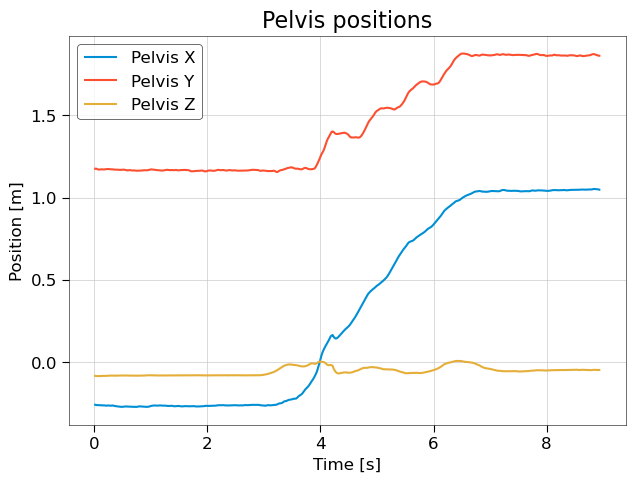

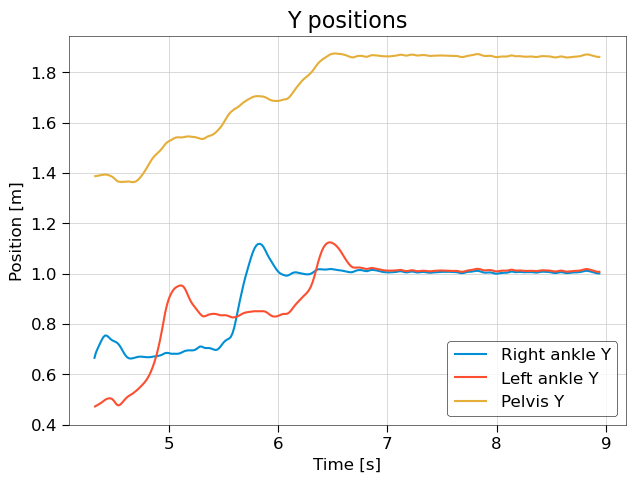

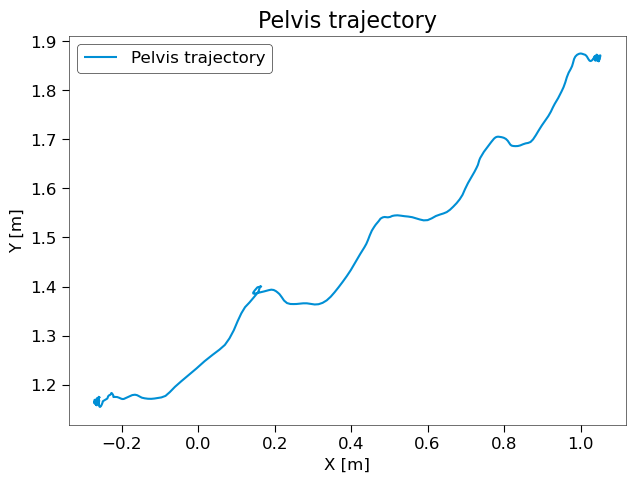

In [25]:
pelvis_x = (filtered_markers["r.PSIS_study"].X + filtered_markers["L.PSIS_study"].X)/2 
pelvis_y = (filtered_markers["r.PSIS_study"].Y + filtered_markers["L.PSIS_study"].Y)/2
pelvis_z = (filtered_markers["r.PSIS_study"].Z + filtered_markers["L.PSIS_study"].Z)/2 

pelvis_marker = pd.DataFrame({"Time": filtered_markers.Time.t, "X": pelvis_x, "Y": pelvis_y, "Z": pelvis_z})

#feet_markers_right=filtered_markers[["Time","r_ankle_study","r_calc_study","r_5meta_study","r_toe_study"]].copy()
#feet_markers_left=filtered_markers[["Time","L_ankle_study","L_calc_study","L_5meta_study","L_toe_study"]].copy()

y_markers = pd.DataFrame({"Time": filtered_markers.Time.t, "pelvis_y": pelvis_y, "r_ankle_y":filtered_markers.r_ankle_study.Y, "L_ankle_y":filtered_markers.L_ankle_study.Y})
y_markers=y_markers.loc[y_markers.Time>4.3,:]

plt.plot(pelvis_marker.Time, pelvis_marker.X, label=f'Pelvis X')
plt.plot(pelvis_marker.Time, pelvis_marker.Y, label=f'Pelvis Y')
plt.plot(pelvis_marker.Time, pelvis_marker.Z, label=f'Pelvis Z')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.title(f"Pelvis positions")
plt.legend()
plt.show()

plt.plot(y_markers.Time, y_markers.r_ankle_y, label=f'Right ankle Y')
plt.plot(y_markers.Time, y_markers.L_ankle_y, label=f'Left ankle Y')
plt.plot(y_markers.Time, y_markers.pelvis_y, label=f'Pelvis Y')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.title(f"Y positions")
plt.legend()
plt.show()

plt.plot(pelvis_marker.X, pelvis_marker.Y, label=f'Pelvis trajectory')
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title(f"Pelvis trajectory")
plt.legend()
plt.show()